In [9]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow import keras

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

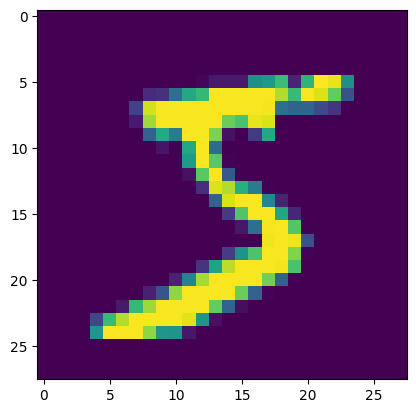

In [13]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

5

In [3]:

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
# hamf softmax phải là 1 vecto  
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
model = keras.Sequential()
# convolution layer tạo ra 1 kernel trượt trên ảnh để trích xuất ra đặc trưng của ảnh đó. các số trong kernel sẽ được học trong quá trình train chứ 0 tạo trước
# số lượng kernel chính là số lượng channel của đầu ra
# 64 kernel mỗi kenel cỡ 3x3 
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
# padding = same: giữ lại kích cỡ giống như ảnh ban đàu nhưng bản chất là kích cỡ thật đã bị thu nhỏ lại và phând còn lại chúng ta chuyển về 0 hết
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# pool size giống kernel size: trượt qua chỉ lấy phần tử lớn nhất mục đích là trích xuất đặc trưng lớn nhất và bỏ qua các phần ko liền quan
model.add(MaxPool2D(pool_size=(2,2), strides=2))
# đầu vào của fully connected network là 1 vector chứ ko phải ma trận 
# flatten: hàm duỗi ma trận thành vecto
model.add(Flatten())
# hàm dense 
# yêu cầu có hàm activation dau hàm dense
# hàm softmax để ra được lớp nào có xác suất lớn nhất
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# kiểm tra cấu trúc của modal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [7]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2775 - accuracy: 0.9434 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0730 - accuracy: 0.9781 - val_loss: 0.0541 - val_accuracy: 0.9830
Epoch 3/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0629 - val_accuracy: 0.9809


In [8]:
y_hat = model.predict(x_test[10:20])
y_hat

1/1 [==============================] - 0s 84ms/step


array([[1.00000000e+00, 1.01572266e-11, 1.51254458e-08, 4.45375377e-12,
        8.45523825e-12, 5.99072666e-11, 3.62975339e-09, 1.45544066e-08,
        1.61166136e-09, 4.27635427e-10],
       [3.44185901e-05, 1.30659220e-10, 2.29342906e-10, 1.04502691e-11,
        1.70591417e-08, 4.07565253e-08, 9.99963641e-01, 2.39205045e-10,
        1.94875224e-06, 5.52786011e-11],
       [2.35153443e-08, 1.99368122e-09, 1.83646645e-08, 5.59445198e-07,
        8.22798908e-03, 8.21598235e-07, 2.08983303e-10, 5.40323788e-04,
        2.04249664e-05, 9.91209865e-01],
       [1.00000000e+00, 1.85421123e-13, 2.71720157e-09, 2.19571705e-11,
        1.27133221e-10, 3.77791887e-09, 2.38800402e-09, 2.12135678e-08,
        6.40555164e-10, 3.88704802e-09],
       [8.38759229e-10, 9.99992371e-01, 4.14126475e-08, 5.10799623e-07,
        7.54963992e-07, 6.51617142e-07, 7.41808348e-09, 1.05706526e-07,
        5.46811225e-06, 1.76930953e-07],
       [8.78807389e-14, 3.98583744e-08, 1.54470603e-11, 4.99606016e-04,
   

In [12]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([0, 6, 9, 0, 1, 5, 9, 7, 3, 4], dtype=int64)

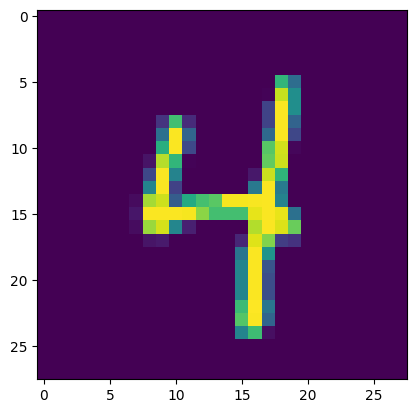

In [17]:
(x_train, y_train), (x_test1, y_test) = mnist.load_data()
plt.imshow(x_test1[19])


In [18]:
model.save("mnist3.hdf5")